In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
tuprs = pd.read_csv("TUPRS.csv")
print(tuprs.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-06-04  103.900002  103.900002  102.199997  103.000000  103.000000   
1  2021-06-07  102.599998  104.300003  101.900002  102.900002  102.900002   
2  2021-06-08  103.000000  104.000000  102.400002  103.400002  103.400002   
3  2021-06-09  103.800003  104.199997  102.500000  102.599998  102.599998   
4  2021-06-10  102.900002  103.800003  102.400002  103.099998  103.099998   

    Volume  
0  5245044  
1  4051474  
2  4396820  
3  3825832  
4  2691677  


In [2]:
print("training days =",tuprs.shape)

training days = (250, 7)


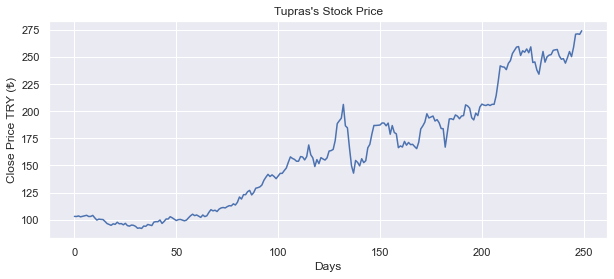

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 4))
plt.title("Tupras's Stock Price")
plt.xlabel("Days")
plt.ylabel("Close Price TRY (₺)")
plt.plot(tuprs["Close"])
plt.show()

In [4]:
tuprs = tuprs[["Close"]]
print(tuprs.head())

        Close
0  103.000000
1  102.900002
2  103.400002
3  102.599998
4  103.099998


In [5]:
futureDays =45

In [6]:
tuprs["Prediction"] = tuprs[["Close"]].shift(-futureDays)
print(tuprs.head())
print(tuprs.tail())

        Close  Prediction
0  103.000000  100.599998
1  102.900002  100.599998
2  103.400002  102.699997
3  102.599998  101.699997
4  103.099998  100.400002
          Close  Prediction
245  259.000000         NaN
246  271.100006         NaN
247  271.399994         NaN
248  271.000000         NaN
249  274.299988         NaN


In [7]:
import numpy as np
x = np.array(tuprs.drop(["Prediction"], 1))[:-futureDays]
print(x)

[[103.      ]
 [102.900002]
 [103.400002]
 [102.599998]
 [103.099998]
 [103.699997]
 [104.      ]
 [102.900002]
 [103.      ]
 [103.900002]
 [101.599998]
 [ 99.599998]
 [100.5     ]
 [100.199997]
 [100.099998]
 [ 98.349998]
 [ 96.400002]
 [ 95.550003]
 [ 94.75    ]
 [ 96.150002]
 [ 95.650002]
 [ 97.599998]
 [ 96.150002]
 [ 96.349998]
 [ 95.25    ]
 [ 96.599998]
 [ 94.5     ]
 [ 94.      ]
 [ 95.      ]
 [ 94.75    ]
 [ 93.800003]
 [ 92.050003]
 [ 92.349998]
 [ 91.900002]
 [ 94.099998]
 [ 93.800003]
 [ 95.550003]
 [ 95.099998]
 [ 94.550003]
 [ 97.75    ]
 [ 98.150002]
 [ 98.099998]
 [ 99.650002]
 [ 96.5     ]
 [ 98.300003]
 [100.599998]
 [100.599998]
 [102.699997]
 [101.699997]
 [100.400002]
 [ 99.150002]
 [100.      ]
 [100.199997]
 [ 99.5     ]
 [ 98.900002]
 [ 99.599998]
 [101.699997]
 [103.599998]
 [105.      ]
 [103.699997]
 [104.300003]
 [103.199997]
 [102.099998]
 [104.300003]
 [102.800003]
 [103.599998]
 [106.699997]
 [109.199997]
 [108.099998]
 [108.699997]
 [107.5     ]
 [109.

In [8]:
y = np.array(tuprs["Prediction"])[:-futureDays]
print(y)

[100.599998 100.599998 102.699997 101.699997 100.400002  99.150002
 100.       100.199997  99.5       98.900002  99.599998 101.699997
 103.599998 105.       103.699997 104.300003 103.199997 102.099998
 104.300003 102.800003 103.599998 106.699997 109.199997 108.099998
 108.699997 107.5      109.699997 110.800003 111.199997 110.800003
 112.       112.900002 112.699997 114.599998 113.5      116.
 120.900002 119.       123.099998 123.       125.800003 127.
 122.800003 125.       129.       129.5      130.199997 131.899994
 136.300003 139.199997 141.800003 139.800003 141.300003 139.800003
 137.800003 140.300003 142.699997 142.699997 145.300003 147.600006
 153.       157.899994 156.5      155.600006 153.899994 153.899994
 158.199997 157.800003 155.100006 158.100006 168.899994 159.899994
 157.       149.       155.399994 151.699997 157.199997 156.
 155.       157.       163.300003 163.699997 164.800003 173.
 188.600006 191.199997 193.600006 206.300003 186.600006 184.699997
 166.300003 149.699

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [10]:
# Creating the decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(xtrain, ytrain)

# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(xtrain, ytrain)

In [11]:
xfuture = tuprs.drop(labels="Prediction", axis=1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[[168.      ]
 [167.      ]
 [172.199997]
 [168.699997]
 [171.199997]
 [169.199997]
 [169.5     ]
 [167.399994]
 [165.5     ]
 [171.5     ]
 [183.699997]
 [186.5     ]
 [190.      ]
 [197.699997]
 [193.800003]
 [194.699997]
 [195.600006]
 [191.      ]
 [192.300003]
 [189.399994]
 [184.100006]
 [183.899994]
 [166.899994]
 [179.899994]
 [192.899994]
 [193.100006]
 [192.300003]
 [196.600006]
 [195.5     ]
 [193.100006]
 [195.600006]
 [196.      ]
 [205.899994]
 [204.899994]
 [202.800003]
 [194.      ]
 [192.      ]
 [198.300003]
 [196.      ]
 [203.899994]
 [206.600006]
 [205.699997]
 [205.300003]
 [206.300003]
 [205.300003]]


In [12]:
treePrediction = tree.predict(xfuture)
print("Decision Tree prediction =",treePrediction)

Decision Tree prediction = [206.399994  206.399994  197.699997  168.        241.899994  241.
 218.1500015 206.399994  244.199997  241.899994  253.300003  256.200012
 259.399994  259.700012  251.5       255.800003  256.200012  257.5
 245.300003  259.399994  245.        245.5       206.399994  234.199997
 245.300003  252.300003  245.300003  250.300003  251.800003  252.300003
 256.200012  255.100006  271.100006  251.        250.399994  251.5
 244.399994  259.700012  255.100006  250.399994  259.        271.100006
 271.399994  231.        271.399994 ]


In [13]:
linearPrediction = linear.predict(xfuture)
print("Linear regression Prediction =",linearPrediction)

Linear regression Prediction = [206.28868259 205.10724241 211.25072783 207.11568718 210.06928764
 207.70640727 208.06084287 205.57981139 203.33508213 210.42372324
 224.83728996 228.14532603 232.28036668 241.37745256 236.76984293
 237.83313201 238.89643881 233.46180686 234.99768265 231.57149548
 225.30987667 225.07357446 204.9890913  220.34781371 235.70653613
 235.94283834 234.99768265 240.07787899 238.7782877  235.94283834
 238.89643881 239.36900779 251.06525854 249.88381836 247.4028046
 237.00612742 234.64324705 242.08632376 239.36900779 248.70237817
 251.89228085 250.82897405 250.35640506 251.53784525 250.35640506]


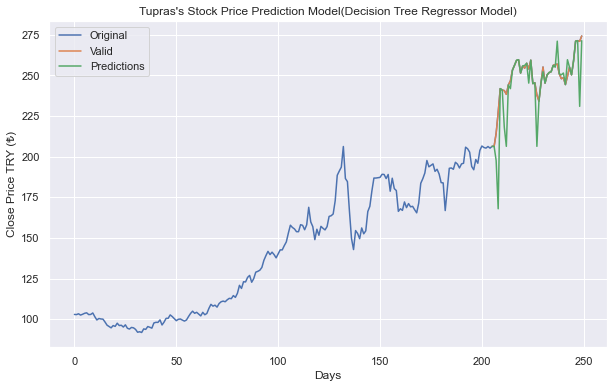

In [14]:
predictions = treePrediction
valid = tuprs[x.shape[0]:]
valid.loc[:,"Predictions"] = predictions
predictions=valid.loc[:,"Predictions"].copy()
plt.figure(figsize=(10, 6))
plt.title("Tupras's Stock Price Prediction Model(Decision Tree Regressor Model)")
plt.xlabel("Days")
plt.ylabel("Close Price TRY (₺)")
plt.plot(tuprs["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()

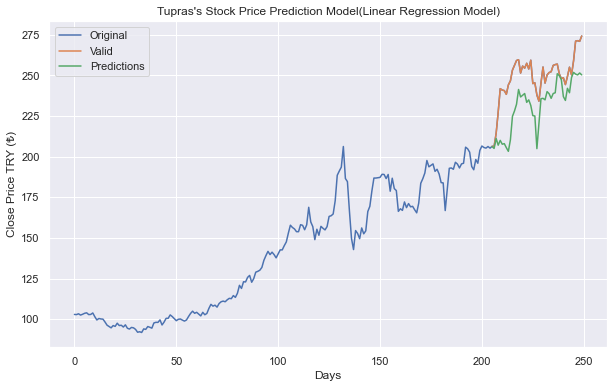

In [15]:
predictions = linearPrediction
valid = tuprs[x.shape[0]:]
valid.loc[:,"Predictions"] = predictions
predictions=valid.loc[:,"Predictions"].copy()


plt.figure(figsize=(10, 6))
plt.title("Tupras's Stock Price Prediction Model(Linear Regression Model)")
plt.xlabel("Days")
plt.ylabel("Close Price TRY (₺)")
plt.plot(tuprs["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Original", "Valid", "Predictions"])
plt.show()